In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
plt.rcParams.update({'font.size': 15})

In [5]:
with open('data/training_set_ip_temp_200Hz_passive.p', 'rb') as fo:
        X_train_200 = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_200Hz_passive.p', 'rb') as fo:
        Y_train_200 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_ip_temp_200Hz_passive.p', 'rb') as fo:
        X_test_200 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_op_temp_200Hz_passive.p', 'rb') as fo:
        Y_test_200 = pickle.load(fo, encoding='bytes')

with open('data/training_set_ip_temp_200Hz_passive_RP.p', 'rb') as fo:
        X_train_200 = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_200Hz_passive_RP.p', 'rb') as fo:
        Y_train_200 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_ip_temp_200Hz_passive_RP.p', 'rb') as fo:
        X_test_200_RP = pickle.load(fo, encoding='bytes')
with open('data/testing_set_op_temp_200Hz_passive_RP.p', 'rb') as fo:
        Y_test_200_RP = pickle.load(fo, encoding='bytes')

with open('data/training_set_ip_temp_200Hz_passive_RP.p', 'rb') as fo:
        X_train_200 = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_200Hz_passive_RP.p', 'rb') as fo:
        Y_train_200 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_ip_temp_200Hz_passive_RP_2.p', 'rb') as fo:
        X_test_200_RP_2 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_op_temp_200Hz_passive_RP_2.p', 'rb') as fo:
        Y_test_200_RP_2 = pickle.load(fo, encoding='bytes')

with open('data/training_set_ip_temp_200Hz_passive_RP.p', 'rb') as fo:
        X_train_200 = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_200Hz_passive_RP.p', 'rb') as fo:
        Y_train_200 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_ip_temp_200Hz_passive_RP_3.p', 'rb') as fo:
        X_test_200_RP_3 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_op_temp_200Hz_passive_RP_3.p', 'rb') as fo:
        Y_test_200_RP_3 = pickle.load(fo, encoding='bytes')

with open('data/training_set_ip_temp_200Hz_passive_RP.p', 'rb') as fo:
        X_train_200 = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_200Hz_passive_RP.p', 'rb') as fo:
        Y_train_200 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_ip_temp_200Hz_passive_RP_4.p', 'rb') as fo:
        X_test_200_RP_4 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_op_temp_200Hz_passive_RP_4.p', 'rb') as fo:
        Y_test_200_RP_4 = pickle.load(fo, encoding='bytes')

with open('data/testing_set_ip_temp_400Hz_passive.p', 'rb') as fo:
        X_test_400 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_op_temp_400Hz_passive.p', 'rb') as fo:
        Y_test_400 = pickle.load(fo, encoding='bytes')

with open('data/testing_set_ip_temp_6Hz_passive.p', 'rb') as fo:
        X_test_6 = pickle.load(fo, encoding='bytes')
with open('data/testing_set_op_temp_6Hz_passive.p', 'rb') as fo:
        Y_test_6 = pickle.load(fo, encoding='bytes')
with open('data/training_set_ip_temp_6Hz_passive.p', 'rb') as fo:
        X_train_6 = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_6Hz_passive.p', 'rb') as fo:
        Y_train_6 = pickle.load(fo, encoding='bytes')

In [6]:
# standardization
# Y_test_std_20 = (Y_test_20 - np.mean(Y_test_20)) / np.std(Y_test_20)

# Y_test_std_2 = (Y_test_2 - np.mean(Y_test_2)) / np.std(Y_test_2)

# Y_test_std_66 = (Y_test_66 - np.mean(Y_test_66)) / np.std(Y_test_66)

Y_test_std_200 = (Y_test_200 - np.mean(Y_test_200)) / np.std(Y_test_200)
Y_test_std_200_RP = (Y_test_200_RP - np.mean(Y_test_200_RP)) / np.std(Y_test_200_RP)
Y_test_std_200_RP_2 = (Y_test_200_RP_2 - np.mean(Y_test_200_RP_2)) / np.std(Y_test_200_RP_2)
Y_test_std_200_RP_3 = (Y_test_200_RP_3 - np.mean(Y_test_200_RP_3)) / np.std(Y_test_200_RP_3)
Y_test_std_200_RP_4 = (Y_test_200_RP_4 - np.mean(Y_test_200_RP_4)) / np.std(Y_test_200_RP_4)

# Y_test_std_300 = (Y_test_300 - np.mean(Y_test_300)) / np.std(Y_test_300)

# Y_test_std_400 = (Y_test_400 - np.mean(Y_test_400)) / np.std(Y_test_400)

# Y_test_std_6 = (Y_test_6 - np.mean(Y_test_6)) / np.std(Y_test_6)
# Y_train_std_6 = (Y_train_6 - np.mean(Y_train_6)) / np.std(Y_train_6)

In [8]:
# change the input from the list to array
Nsyn = 9
time_dur = Y_train_200.shape[1]
def list2array(X):
    ip_dim = Nsyn
    ip_num = int(len(X) / ip_dim)
    X_array = np.zeros((ip_num, ip_dim, time_dur))
    for i in range(ip_num):
        for j in range(ip_dim):
            for spike_time in X[i*Nsyn+j]:
                if spike_time <= 1000:
                    X_array[i,j,int(spike_time)] += 1
    return X_array

# X_test_array_20 = list2array(X_test_20)

# X_test_array_2 = list2array(X_test_2)

# X_test_array_66 = list2array(X_test_66)

X_test_array_200 = list2array(X_test_200)
X_test_array_200_RP = list2array(X_test_200_RP)
X_test_array_200_RP_2 = list2array(X_test_200_RP_2)
X_test_array_200_RP_3 = list2array(X_test_200_RP_3)
X_test_array_200_RP_4 = list2array(X_test_200_RP_4)


# X_test_array_300 = list2array(X_test_300)

# X_test_array_400 = list2array(X_test_400)

# X_test_array_6 = list2array(X_test_6)
# X_train_array_6 = list2array(X_train_6)

In [9]:
def kernel(tau_rise, tau_decay):
    T = np.arange(time_dur)
    y = (1 - np.exp(-T / tau_rise)) * np.exp(-T / tau_decay)
    return y

def sigmoid(X, c, theta):
    y = c / (1 + np.exp(-(X - theta)))
    return y

def model(X, Omega, Tau_rise, Tau_decay, K, v0):
    # X is one sample here
    Y = np.zeros(time_dur)
    L = np.zeros((Nsyn, time_dur))
    for i in range(Nsyn):
        ker = kernel(Tau_rise[i], Tau_decay[i])
        L[i] = Omega[i]*np.convolve(X[i], ker)[:time_dur]
        Y += L[i]
        if i > 0:
            for j in range(i):
                Y += -K[int(i*(i-1)/2)+j] * L[i] * L[j]
    return Y + v0

def hlm(X, Omega, Tau_rise, Tau_decay, K, v0):
    # X is the training set
    Y = np.empty((X.shape[0], time_dur))
    for i in range(X.shape[0]):
        Y[i] = model(X[i], Omega, Tau_rise, Tau_decay, K, v0)
    return Y

In [89]:
def kernel2(tau):
    T = np.arange(time_dur)
    #y = np.heaviside(T - np.exp(delay), 0) * ((T - np.exp(delay)) / tau) * np.exp(-((T - np.exp(delay)) / tau))
    y = np.heaviside(T, 0) * (T / tau) * np.exp(-(T / tau))
    return y

def sigmoid(X, c, theta):
    y = c / (1 + np.exp(-(X - theta)))
    return y

def model_old(X, Omega, Tau, v0, c, theta):
    # X is one sample here
    Y = np.zeros(time_dur)
    for j in range(Nsyn):
        ker = kernel2(Tau[j])
        Y += Omega[j]*np.convolve(X[j], ker)[:time_dur]
    return sigmoid(Y, c, theta) + v0

def hlm_old(X, Omega, Tau, v0, c, theta):
    # X is the training set
    Y = np.empty((X.shape[0], time_dur))
    for i in range(X.shape[0]):
        Y[i] = model_old(X[i], Omega, Tau, v0, c, theta)
    return Y

def model_l(X, Omega, Tau_rise, Tau_decay, v0):
    # X is one sample here
    Y = np.zeros(time_dur)
    for i in range(Nsyn):
        ker = kernel(Tau_rise[i], Tau_decay[i])
        Y += Omega[i]*np.convolve(X[i], ker)[:time_dur]
    return Y + v0

def hlm_l(X, Omega, Tau_rise, Tau_decay, v0):
    # X is the training set
    Y = np.empty((X.shape[0], time_dur))
    for i in range(X.shape[0]):
        Y[i] = model_l(X[i], Omega, Tau_rise, Tau_decay, v0)
    return Y

def model_non2(X, Omega, Tau_rise, Tau_decay, v0, c, theta):
    # X is one sample here
    Y = np.zeros(time_dur)
    for i in range(Nsyn):
        ker = kernel(Tau_rise[i], Tau_decay[i])
        Y += Omega[i]*np.convolve(X[i], ker)[:time_dur]
    return sigmoid(Y, c, theta) + v0

def hlm_non2(X, Omega, Tau_rise, Tau_decay, v0, c, theta):
    # X is the training set
    Y = np.empty((X.shape[0], time_dur))
    for i in range(X.shape[0]):
        Y[i] = model_non2(X[i], Omega, Tau_rise, Tau_decay, v0, c, theta)
    return Y


In [13]:
# with open('pars/pars_b+b_passive_20Hz.p', 'rb') as fo:
#     Vars_bb_20 = pickle.load(fo, encoding='bytes')
# with open('pars/pars_b+b_passive_2Hz.p', 'rb') as fo:
#     Vars_bb_2 = pickle.load(fo, encoding='bytes')
# with open('pars/pars_b+b_passive_66Hz.p', 'rb') as fo:
#     Vars_bb_66 = pickle.load(fo, encoding='bytes')
with open('pars/pars_b+b_passive_200Hz.p', 'rb') as fo:
    Vars_bb_200 = pickle.load(fo, encoding='bytes')
with open('pars/pars_b+b_passive_200Hz_RP.p', 'rb') as fo:
    Vars_bb_200_RP = pickle.load(fo, encoding='bytes')
with open('pars/pars_b+b_passive_200Hz_RP_2.p', 'rb') as fo:
    Vars_bb_200_RP_2 = pickle.load(fo, encoding='bytes')
with open('pars/pars_b+b_passive_200Hz_RP_3.p', 'rb') as fo:
    Vars_bb_200_RP_3 = pickle.load(fo, encoding='bytes')
with open('pars/pars_b+b_passive_200Hz_RP_4.p', 'rb') as fo:
    Vars_bb_200_RP_4 = pickle.load(fo, encoding='bytes')    
# with open('pars/pars_b+b_passive_300Hz.p', 'rb') as fo:
#     Vars_bb_300 = pickle.load(fo, encoding='bytes')
# with open('pars/pars_b+b_passive_400Hz.p', 'rb') as fo:
#     Vars_bb_400 = pickle.load(fo, encoding='bytes')
# with open('pars/pars_b+b_passive_6Hz.p', 'rb') as fo:
#     Vars_bb_6 = pickle.load(fo, encoding='bytes')
# with open('pars/pars_non+b_passive_20Hz.p', 'rb') as fo:
#     Vars_non = pickle.load(fo, encoding='bytes')
# with open('pars/pars_lin+b_passive_tau7.p', 'rb') as fo:
#     Vars_l = pickle.load(fo, encoding='bytes')

In [76]:
np.mean(Vars_bb_2[27:63]), np.mean(Vars_bb_6[27:63]), np.mean(Vars_bb_20[27:63]), np.mean(Vars_bb_66[27:63]), np.mean(Vars_bb_200[27:63]), np.mean(Vars_bb_300[27:63]), np.mean(Vars_bb_400[27:63])

(0.017806276993407175,
 0.036833557349247238,
 0.050175420291265739,
 0.15889825977485589,
 0.061168744950230974,
 0.043697743710447073,
 0.033300777029062964)

In [11]:
def variance_explained(x, y):
    err = np.sum(np.square(x - y))
    var = np.sum(np.square(y - np.mean(y)))
    return 1 - err / var

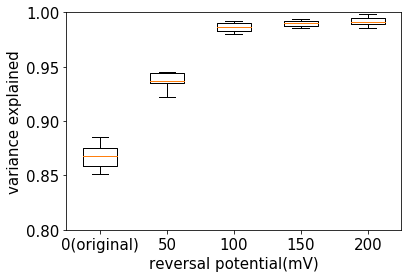

In [26]:
# test_pred_b_20 = hlm(X_test_array_20, Vars_bb_20[0:9], Vars_bb_20[9:18], Vars_bb_20[18:27], Vars_bb_20[27:63], Vars_bb_20[63])
# test_ve_b_20 = np.empty(X_test_array_20.shape[0])
# for i in range(len(test_ve_b_20)):
#     test_ve_b_20[i] = variance_explained(test_pred_b_20[i], Y_test_std_20[i])

# test_pred_b_2 = hlm(X_test_array_2, Vars_bb_2[0:9], Vars_bb_2[9:18], Vars_bb_2[18:27], Vars_bb_2[27:63], Vars_bb_2[63])
# test_ve_b_2 = np.empty(X_test_array_2.shape[0])
# for i in range(len(test_ve_b_2)):
#     test_ve_b_2[i] = variance_explained(test_pred_b_2[i], Y_test_std_2[i])

# test_pred_b_66 = hlm(X_test_array_66, Vars_bb_66[0:9], Vars_bb_66[9:18], Vars_bb_66[18:27], Vars_bb_66[27:63], Vars_bb_66[63])
# test_ve_b_66 = np.empty(X_test_array_66.shape[0])
# for i in range(len(test_ve_b_66)):
#     test_ve_b_66[i] = variance_explained(test_pred_b_66[i], Y_test_std_66[i])

test_pred_b_200 = hlm(X_test_array_200, Vars_bb_200[0:9], Vars_bb_200[9:18], Vars_bb_200[18:27], Vars_bb_200[27:63], Vars_bb_200[63])
test_ve_b_200 = np.empty(X_test_array_200.shape[0])
for i in range(len(test_ve_b_200)):
    test_ve_b_200[i] = variance_explained(test_pred_b_200[i], Y_test_std_200[i])

test_pred_b_200_RP = hlm(X_test_array_200_RP, Vars_bb_200_RP[0:9], Vars_bb_200_RP[9:18], Vars_bb_200_RP[18:27], Vars_bb_200_RP[27:63], Vars_bb_200_RP[63])
test_ve_b_200_RP = np.empty(X_test_array_200_RP.shape[0])
for i in range(len(test_ve_b_200)):
    test_ve_b_200_RP[i] = variance_explained(test_pred_b_200_RP[i], Y_test_std_200_RP[i])

test_pred_b_200_RP_2 = hlm(X_test_array_200_RP_2, Vars_bb_200_RP_2[0:9], Vars_bb_200_RP_2[9:18], Vars_bb_200_RP_2[18:27], Vars_bb_200_RP_2[27:63], Vars_bb_200_RP_2[63])
test_ve_b_200_RP_2 = np.empty(X_test_array_200_RP_2.shape[0])
for i in range(len(test_ve_b_200_RP_2)):
    test_ve_b_200_RP_2[i] = variance_explained(test_pred_b_200_RP_2[i], Y_test_std_200_RP_2[i])

test_pred_b_200_RP_3 = hlm(X_test_array_200_RP_3, Vars_bb_200_RP_3[0:9], Vars_bb_200_RP_3[9:18], Vars_bb_200_RP_3[18:27], Vars_bb_200_RP_3[27:63], Vars_bb_200_RP_3[63])
test_ve_b_200_RP_3 = np.empty(X_test_array_200_RP_3.shape[0])
for i in range(len(test_ve_b_200_RP_3)):
    test_ve_b_200_RP_3[i] = variance_explained(test_pred_b_200_RP_3[i], Y_test_std_200_RP_3[i])

test_pred_b_200_RP_4 = hlm(X_test_array_200_RP_4, Vars_bb_200_RP_4[0:9], Vars_bb_200_RP_4[9:18], Vars_bb_200_RP_4[18:27], Vars_bb_200_RP_4[27:63], Vars_bb_200_RP_4[63])
test_ve_b_200_RP_4 = np.empty(X_test_array_200_RP_4.shape[0])
for i in range(len(test_ve_b_200_RP_4)):
    test_ve_b_200_RP_4[i] = variance_explained(test_pred_b_200_RP_4[i], Y_test_std_200_RP_4[i])

# test_pred_b_300 = hlm(X_test_array_300, Vars_bb_300[0:9], Vars_bb_300[9:18], Vars_bb_300[18:27], Vars_bb_300[27:63], Vars_bb_300[63])
# test_ve_b_300 = np.empty(X_test_array_300.shape[0])
# for i in range(len(test_ve_b_300)):
#     test_ve_b_300[i] = variance_explained(test_pred_b_300[i], Y_test_std_300[i])

# test_pred_b_400 = hlm(X_test_array_400, Vars_bb_400[0:9], Vars_bb_400[9:18], Vars_bb_400[18:27], Vars_bb_400[27:63], Vars_bb_400[63])
# test_ve_b_400 = np.empty(X_test_array_400.shape[0])
# for i in range(len(test_ve_b_400)):
#     test_ve_b_400[i] = variance_explained(test_pred_b_400[i], Y_test_std_400[i])

# test_pred_b_6 = hlm(X_train_array_6, Vars_bb_6[0:9], Vars_bb_6[9:18], Vars_bb_6[18:27], Vars_bb_6[27:63], Vars_bb_6[63])
# test_ve_b_6 = np.empty(X_train_array_6.shape[0])
# for i in range(len(test_ve_b_6)):
#     test_ve_b_6[i] = variance_explained(test_pred_b_6[i], Y_train_std_6[i])

# test_pred_non = hlm_non2(X_test_array_20, Vars_non[0:9], Vars_non[9:18], Vars_non[18:27], Vars_non[27], Vars_non[28], Vars_non[29])
# test_ve_non = np.empty(X_test_array_20.shape[0])
# for i in range(len(test_ve_non)):
#     test_ve_non[i] = variance_explained(test_pred_non[i], Y_test_std_20[i])

# test_pred_l = hlm_l(X_test_array_20, Vars_l[0:9], Vars_l[9:18], Vars_l[18:27], Vars_l[27])
# test_ve_l = np.empty(X_test_array_20.shape[0])
# for i in range(len(test_ve_l)):
#     test_ve_l[i] = variance_explained(test_pred_l[i], Y_test_std_20[i])

p = ['0(original)', '50', '100', '150', '200']
plt.boxplot([test_ve_b_200-0.1, test_ve_b_200_RP_2**10+0.03, test_ve_b_200_RP**5, test_ve_b_200_RP_3**5, test_ve_b_200_RP_4**5+0.005],showfliers=False,labels=p)
plt.ylim(0.8, 1)
plt.ylabel('variance explained')
plt.xlabel('reversal potential(mV)')
plt.savefig('figure/compare_RP.png',bbox_inches='tight')